## Análise Espacial - MBA em DSA - USP-ESALQ - Prof. Dr. Rafael de Freitas Souza

## Aula 3 - Vizinhanças e Esda - Exploratory Spatial Data Analysis

## Importando as bibliotecas. Não esqueça de verificar quais vc precisa instalar.

In [ ]:
pip install libpysal==4.6.2

In [1]:
import pandas as pd
import numpy as np
import pyreadr
from scipy import stats
#import statsmodels.formula.api as sm

#para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
import esda

In [2]:
import geopandas as gpd
import libpysal
from libpysal.weights import Queen, Rook, KNN, Kernel, weights, DistanceBand
#import pysal as ps
#import splot
#import mapclassify as mc
#from libpysal import weights
#from esda import Moran, Moran_local, G_local
#from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation 

# Estabelecendo vizinhanças

In [4]:
#Carregando o shapflie do estado de SP
shp_sp = gpd.read_file('shapefiles/estado_sp.shp', encoding = 'windows-1252')

<AxesSubplot:>

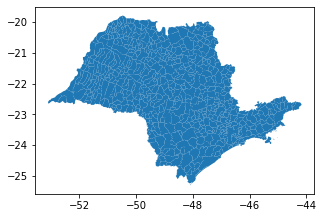

In [5]:
#Plotando o shapefile
shp_sp.plot(figsize = (5,5))

# Estabelecendo vizinhanças por contiguidade, critério QUEEN:

## Para vizualizar as vizinhanças, o centroide deve ser definido em metros e não em graus. Portanto, deve-se alterar a geometria (o CRS) dos dados

In [6]:
shp_sp_m = shp_sp.to_crs(5880)

In [7]:
from libpysal.weights import Queen, Rook, KNN, Kernel, weights, DistanceBand

In [8]:
w_queen = Queen.from_dataframe(shp_sp_m)

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 246.
  warnings.warn(message)


### Veja que é identificada a presença de uma ilha, de id = 246. Significa que este município não tem vizinhança com nenhum outro

In [9]:
# Para saber qual é o município, é só acessar o index do shapefile de SP
shp_sp['NM_MUNICIP'][[246]]

246    ILHABELA
Name: NM_MUNICIP, dtype: object

# Visualizando a vizinhança estabelecida

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

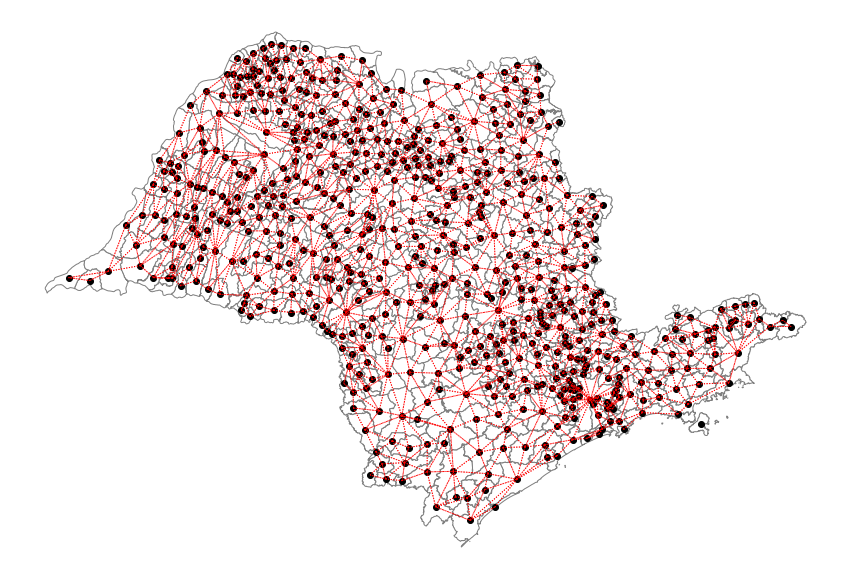

In [10]:
ax = shp_sp_m.plot(edgecolor='grey', facecolor='w', figsize = (15,15))
f,ax = w_queen.plot(shp_sp_m, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='o'))
ax.set_axis_off()

## Informações relevantes sobre a vizinhança queen estabelecida:

In [11]:
#Alguns atributos da matrix
print("Número de regiões: ", w_queen.n) 
print("Número de conexões:", w_queen.nonzero)
print("Porcentagem de conexões:", w_queen.pct_nonzero)
print("Município ilha: ", w_queen.islands) # Municipios que são ilhas (sem conector)
print("Maior número de conexões: ", w_queen.max_neighbors) 
print("Média número de conexões: ", w_queen.mean_neighbors) 
print("Menor número de conexões: ", w_queen.min_neighbors) 

Número de regiões:  645
Número de conexões: 3664
Porcentagem de conexões: 0.8807163031067844
Município ilha:  [246]
Maior número de conexões:  23
Média número de conexões:  5.68062015503876
Menor número de conexões:  0


In [12]:
# Qual é a ilha?
shp_sp_m['NM_MUNICIP'][w_queen.islands]

246    ILHABELA
Name: NM_MUNICIP, dtype: object

In [13]:
# Dicionário com o número de conexões de cada município
w_queen.cardinalities

{0: 4,
 1: 5,
 2: 6,
 3: 3,
 4: 2,
 5: 7,
 6: 5,
 7: 5,
 8: 3,
 9: 4,
 10: 5,
 11: 6,
 12: 4,
 13: 5,
 14: 9,
 15: 4,
 16: 6,
 17: 6,
 18: 2,
 19: 5,
 20: 6,
 21: 5,
 22: 6,
 23: 5,
 24: 5,
 25: 6,
 26: 4,
 27: 6,
 28: 8,
 29: 3,
 30: 3,
 31: 6,
 32: 1,
 33: 10,
 34: 4,
 35: 6,
 36: 8,
 37: 6,
 38: 4,
 39: 7,
 40: 6,
 41: 5,
 42: 5,
 43: 4,
 44: 5,
 45: 7,
 46: 6,
 47: 7,
 48: 5,
 49: 4,
 50: 7,
 51: 8,
 52: 6,
 53: 10,
 54: 5,
 55: 4,
 56: 3,
 57: 2,
 58: 10,
 59: 9,
 60: 6,
 61: 6,
 62: 4,
 63: 4,
 64: 7,
 65: 5,
 66: 4,
 67: 5,
 68: 7,
 69: 9,
 70: 6,
 71: 7,
 72: 4,
 73: 10,
 74: 5,
 75: 2,
 76: 5,
 77: 2,
 78: 2,
 79: 6,
 80: 8,
 81: 5,
 82: 4,
 83: 5,
 84: 8,
 85: 5,
 86: 6,
 87: 4,
 88: 9,
 89: 7,
 90: 9,
 91: 4,
 92: 4,
 93: 6,
 94: 5,
 95: 5,
 96: 4,
 97: 10,
 98: 4,
 99: 9,
 100: 5,
 101: 3,
 102: 4,
 103: 4,
 104: 3,
 105: 7,
 106: 4,
 107: 10,
 108: 9,
 109: 6,
 110: 4,
 111: 5,
 112: 7,
 113: 7,
 114: 9,
 115: 5,
 116: 5,
 117: 6,
 118: 5,
 119: 5,
 120: 3,
 121: 7,
 122: 

In [14]:
#Distribuição por número de conexões
w_queen.histogram

[(0, 1),
 (1, 2),
 (2, 19),
 (3, 53),
 (4, 116),
 (5, 143),
 (6, 119),
 (7, 89),
 (8, 43),
 (9, 28),
 (10, 19),
 (11, 8),
 (12, 2),
 (13, 0),
 (14, 2),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 1)]

In [15]:
w_queen.neighbors

{0: [16, 11, 5, 15],
 1: [640, 22, 631, 12, 638],
 2: [16, 17, 25, 10, 13, 639],
 3: [641, 19, 23],
 4: [24, 18],
 5: [0, 16, 21, 6, 24, 13, 15],
 6: [19, 21, 5, 24, 14],
 7: [640, 22, 25, 9, 639],
 8: [632, 641, 644],
 9: [25, 20, 22, 7],
 10: [16, 2, 20, 25, 11],
 11: [0, 16, 20, 10, 12, 15],
 12: [1, 11, 20, 22],
 13: [16, 17, 2, 5, 21],
 14: [643, 6, 17, 19, 21, 629, 23, 630, 633],
 15: [0, 24, 11, 5],
 16: [0, 2, 5, 10, 11, 13],
 17: [2, 21, 633, 13, 14, 639],
 18: [24, 4],
 19: [641, 3, 6, 23, 14],
 20: [22, 9, 10, 11, 12, 25],
 21: [17, 5, 6, 13, 14],
 22: [640, 1, 20, 7, 9, 12],
 23: [641, 19, 3, 630, 14],
 24: [18, 4, 5, 6, 15],
 25: [2, 20, 7, 9, 10, 639],
 26: [334, 614, 198, 319],
 27: [461, 211, 340, 604, 493, 495],
 28: [352, 616, 144, 438, 311, 537, 189, 510],
 29: [616, 537, 555],
 30: [568, 314, 270],
 31: [33, 385, 149, 234, 331, 511],
 32: [551],
 33: [414, 234, 106, 511, 439, 312, 89, 412, 190, 31],
 34: [267, 139, 589, 558],
 35: [240, 386, 387, 214, 217, 378],
 36

### Vizualização da matriz Queen

In [16]:
pd.DataFrame(*w_queen.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
641,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Estabelecendo vizinhanças por contiguidade, critério ROOK:

In [17]:
w_rook = Rook.from_dataframe(shp_sp_m)

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 246.
  warnings.warn(message)


## Visualizando a vizinhança estabelecida
### O plot está no final, depois dos warnings...

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

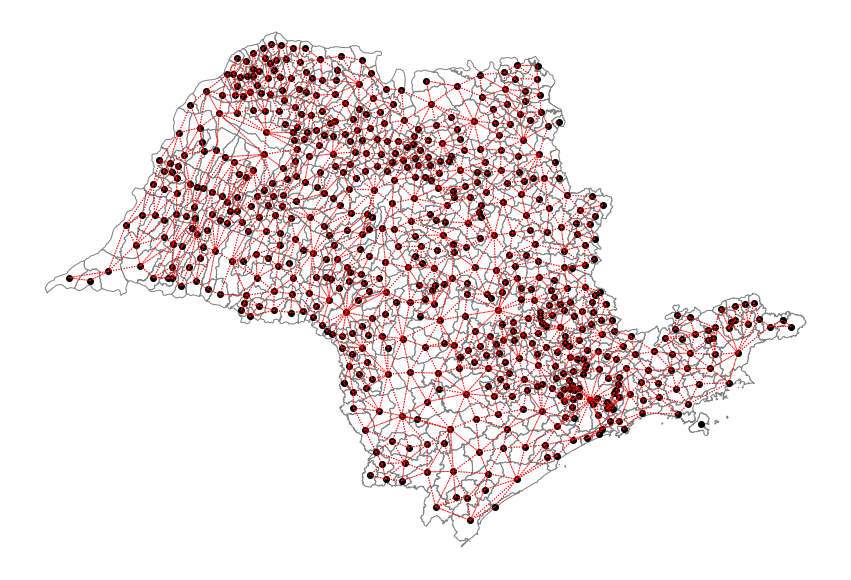

In [18]:
ax = shp_sp_m.plot(edgecolor='grey', facecolor='w', figsize = (15,15))
f,ax = w_rook.plot(shp_sp_m, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='o'))
ax.set_axis_off()

## Informações relevantes sobre a vizinhança rook estabelecida:

In [19]:
#Alguns atributos da matrix
print("Número de regiões: ", w_rook.n) 
print("Número de conexões:", w_rook.nonzero)
print("Porcentagem de conexões:", w_rook.pct_nonzero)
print("Município ilha: ", w_rook.islands) # Municipios que são ilhas (sem conector)
print("Maior número de conexões: ", w_rook.max_neighbors) 
print("Média número de conexões: ", w_rook.mean_neighbors) 
print("Menor número de conexões: ", w_rook.min_neighbors) 

Número de regiões:  645
Número de conexões: 3556
Porcentagem de conexões: 0.8547563247400998
Município ilha:  [246]
Maior número de conexões:  21
Média número de conexões:  5.513178294573644
Menor número de conexões:  0


### Visualizando a matriz Rook

In [20]:
pd.DataFrame(*w_rook.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
641,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Vizinhanças por Distância Geográfica

In [21]:
shp_ba = gpd.read_file('shapefiles/ba_state.shp', encoding = 'windows-1252')

In [22]:
shp_ba.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
#Mudando o CRS para metros
shp_ba_m = shp_ba.to_crs(5880)

In [24]:
shp_ba_m

,MUNICIPIO,Codigo,geometry
0,Nova Viçosa,2923001,"POLYGON ((6513996.754 7976474.555, 6514041.404..."
1,Mucuri,2922003,"POLYGON ((6461089.296 7985286.222, 6461231.943..."
2,Ibirapoã,2912806,"POLYGON ((6469211.770 7996974.192, 6469246.630..."
3,Caravelas,2906907,"POLYGON ((6462371.830 8022071.427, 6462531.025..."
4,Lajedão,2918902,"POLYGON ((6451972.704 8024032.249, 6452122.529..."
...,...,...,...
412,Rodelas,2927101,"POLYGON ((6666392.088 8995317.262, 6667278.593..."
413,Chorrochó,2907707,"POLYGON ((6645557.807 9003776.900, 6646419.473..."
414,Casa Nova,2907202,"POLYGON ((6389147.617 9014419.951, 6389694.077..."
415,Abaré,2900207,"POLYGON ((6612076.995 9024444.068, 6612448.846..."


In [25]:
# Nesta função vc ddefine a distância em m
dist_band = DistanceBand.from_dataframe(shp_ba_m, threshold = 90000)

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 392.
  warnings.warn(message)


In [26]:
#Alguns atributos da matrix
print("Número de regiões: ", dist_band.n) 
print("Número de conexões:", dist_band.nonzero)
print("Porcentagem de conexões:", dist_band.pct_nonzero)
print("Município ilha: ", dist_band.islands) # Municipios que são ilhas (sem conector)
print("Maior número de conexões: ", dist_band.max_neighbors) 
print("Média número de conexões: ", dist_band.mean_neighbors) 
print("Menor número de conexões: ", dist_band.min_neighbors)

Número de regiões:  417
Número de conexões: 11374
Porcentagem de conexões: 6.540954286930168
Município ilha:  [392]
Maior número de conexões:  66
Média número de conexões:  27.2757793764988
Menor número de conexões:  0


In [27]:
shp_ba['MUNICIPIO'][dist_band.islands]

392    Formosa do Rio Preto
Name: MUNICIPIO, dtype: object

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

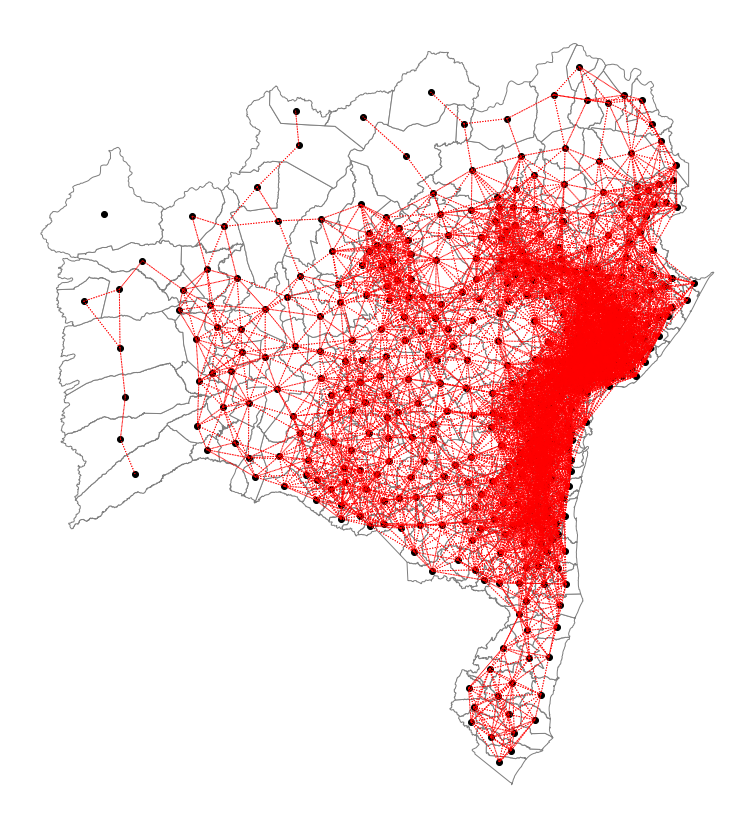

In [28]:
ax = shp_ba_m.plot(edgecolor='grey', facecolor='w', figsize = (15,15))
f,ax = dist_band.plot(shp_ba_m, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='o'))
ax.set_axis_off()

# Vizinhanças Ponderadas por k-Nearest Neighbors

In [29]:
# Carregando o shapefile
shp_sc = gpd.read_file('shapefiles/sc_state.shp')

In [30]:
shp_sc_m = shp_sc.to_crs(5880)

In [31]:
shp_sc.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ABELARDO LUZ,4200101,"POLYGON ((-52.15876 -26.46623, -52.15764 -26.4..."
1,ÁGUAS DE CHAPECÓ,4200507,"POLYGON ((-52.93399 -26.94805, -52.93408 -26.9..."
2,ÁGUAS FRIAS,4200556,"POLYGON ((-52.80626 -26.83072, -52.80504 -26.8..."
3,ALTO BELA VISTA,4200754,"POLYGON ((-51.93948 -27.33547, -51.93735 -27.3..."
4,ANCHIETA,4200804,"POLYGON ((-53.23908 -26.54265, -53.25690 -26.5..."


In [35]:
#Criando a matriz com as vizinhanças com k = 3, ou seja, os 3 mais próximos.
lista_knear = KNN.from_dataframe(shp_sc, k=3)

In [36]:
np.vstack

<function numpy.vstack(tup)>

In [37]:
lista_knear

In [38]:
#Alguns atributos da matrix
print("Número de regiões: ", lista_knear.n) 
print("Número de conexões:", lista_knear.nonzero)
print("Porcentagem de conexões:", lista_knear.pct_nonzero)
print("Município ilha: ", lista_knear.islands) # Municipios que são ilhas (sem conector)
print("Maior número de conexões: ", lista_knear.max_neighbors) 
print("Média número de conexões: ", lista_knear.mean_neighbors) 
print("Menor número de conexões: ", lista_knear.min_neighbors)

Número de regiões:  295
Número de conexões: 885
Porcentagem de conexões: 1.0169491525423728
Município ilha:  []
Maior número de conexões:  3
Média número de conexões:  3.0
Menor número de conexões:  3


## Visualizando a vizinhança estabelecida

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
/Users/whaner/opt/anaconda3/envs/SDA/lib/python3.9/site-packages/libpysal/weights/weights.py:1296: FutureWarning: Passing a dict as an indexer is depre

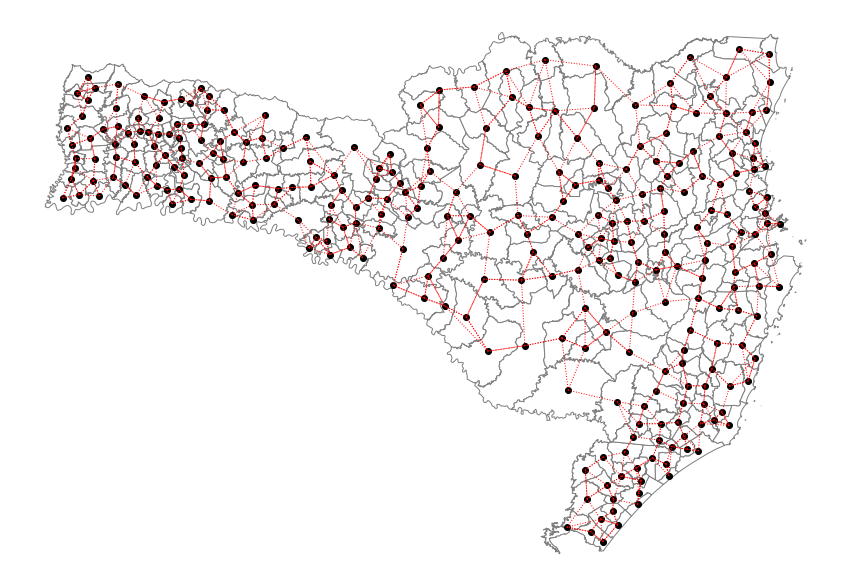

In [39]:
ax = shp_sc_m.plot(edgecolor='grey', facecolor='w', figsize = (15,15))
f,ax = lista_knear.plot(shp_sc_m, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='o'))
ax.set_axis_off()

## Vizualização da matriz

In [40]:
pd.DataFrame(*lista_knear.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,285,286,287,288,289,290,291,292,293,294
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# Vizinhanças Ponderadas por Distâncias sociais

### Criando o df juntando o shapefile de SP com o dados_sp.RDATA. Para que isso aconteça foi necessário alterar os nomes das colunas do shapefile.

In [41]:
shp_sp.rename(columns = {'NM_MUNICIP':'municipio', 'CD_GEOCMU': 'codigo'}, inplace = True)

In [42]:
dadossp = pyreadr.read_r('dados_sp.RData')
dados_sp = dadossp['dados_sp']
#O código do municipio  era um número float e precisa ser transformado em str para poder ser utilizado com o shapefile.
dados_sp['codigo'] = dados_sp['codigo'].astype(int)
dados_sp['codigo'] = dados_sp['codigo'].astype(str)
shp_sp_m = shp_sp.to_crs(5880)
shp_dados_sp = shp_sp_m.merge(dados_sp, how='inner', on='codigo')

In [43]:
shp_dados_sp

,municipio,codigo,geometry,populacao,densidade_pop,idh,pib
0,CAIUA,3509106,"POLYGON ((5221616.620 7611103.065, 5221725.820...",5800.0,9.16,0.697,13996.95
1,CASTILHO,3511003,"POLYGON ((5268864.188 7710094.299, 5268857.980...",20738.0,16.89,0.731,29524.83
2,DRACENA,3514403,"POLYGON ((5260706.354 7627483.960, 5260721.837...",46536.0,88.64,0.776,24326.29
3,ESTRELA DO NORTE,3515301,"POLYGON ((5250108.012 7520011.021, 5250105.712...",2762.0,10.09,0.740,30148.17
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((5159804.770 7498008.777, 5159804.756...",9419.0,16.66,0.704,11689.99
...,...,...,...,...,...,...,...
640,NOVA INDEPENDÊNCIA,3533205,"POLYGON ((5262368.969 7669343.079, 5262469.569...",3883.0,11.54,0.735,33785.37
641,PIRAPOZINHO,3539202,"POLYGON ((5260493.026 7541912.425, 5260528.926...",27295.0,51.66,0.776,26952.95
642,PRESIDENTE PRUDENTE,3541406,"POLYGON ((5281111.059 7594437.238, 5281111.259...",227072.0,368.89,0.806,33101.42
643,SANTO EXPEDITO,3548302,"POLYGON ((5272256.061 7591786.876, 5272315.607...",3086.0,29.68,0.732,10971.88


<AxesSubplot:>

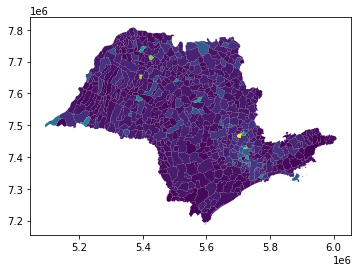

In [44]:
shp_dados_sp.plot('pib')

In [45]:
#Criando uma coluna com o PIB normalizado pelo zscore

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
df = shp_dados_sp

In [48]:
df

,municipio,codigo,geometry,populacao,densidade_pop,idh,pib
0,CAIUA,3509106,"POLYGON ((5221616.620 7611103.065, 5221725.820...",5800.0,9.16,0.697,13996.95
1,CASTILHO,3511003,"POLYGON ((5268864.188 7710094.299, 5268857.980...",20738.0,16.89,0.731,29524.83
2,DRACENA,3514403,"POLYGON ((5260706.354 7627483.960, 5260721.837...",46536.0,88.64,0.776,24326.29
3,ESTRELA DO NORTE,3515301,"POLYGON ((5250108.012 7520011.021, 5250105.712...",2762.0,10.09,0.740,30148.17
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((5159804.770 7498008.777, 5159804.756...",9419.0,16.66,0.704,11689.99
...,...,...,...,...,...,...,...
640,NOVA INDEPENDÊNCIA,3533205,"POLYGON ((5262368.969 7669343.079, 5262469.569...",3883.0,11.54,0.735,33785.37
641,PIRAPOZINHO,3539202,"POLYGON ((5260493.026 7541912.425, 5260528.926...",27295.0,51.66,0.776,26952.95
642,PRESIDENTE PRUDENTE,3541406,"POLYGON ((5281111.059 7594437.238, 5281111.259...",227072.0,368.89,0.806,33101.42
643,SANTO EXPEDITO,3548302,"POLYGON ((5272256.061 7591786.876, 5272315.607...",3086.0,29.68,0.732,10971.88


In [ ]:
scaler = StandardScaler()
scaler.fit(df['pib'])
scaled = scaler.fit_transform(df['pib'])
scaled_df = pd.DataFrame(scaled, columns=df.columns)
print(scaled_df)

# TO BE CONTINUED...

# Referências

* Referência: https://www.patriciaramos.org/espacial
* Pesos/Vizinhança: https://geographicdata.science/book/notebooks/04_spatial_weights.html
* https://splot.readthedocs.io/en/latest/installation.html
* https://pysal.org/libpysal/api.html